In [8]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import numpy as np
from data_funcs import generate_data

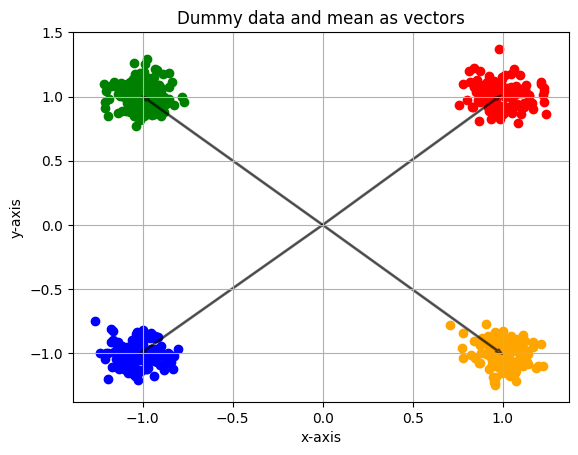

In [9]:
data, labels = generate_data()
plt.close()
fig, ax = plt.subplots(1)#, sharex='col', sharey='row', gridspec_kw={'wspace': 0})

colors = ['red','green','blue','orange']
means = np.mean(np.reshape(data,(4,int(data.shape[0]/4),data.shape[-1])),axis=1)
cluster_N = int(data.shape[0] / 4)
for color,mean,i in zip(colors,means,range(len(colors))):
    ax.scatter(data[i*cluster_N:(i+1)*cluster_N,0],data[i*cluster_N:(i+1)*cluster_N,1],color=color)
    ax.arrow(0,0,mean[0],mean[1],length_includes_head=True,width=0.01,color=(0,0,0,0.5))
plt.title('Dummy data and mean as vectors')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
ax.grid('on')

In [16]:
def init_weights(bias = False):
    W = np.random.rand(2, 4) - 0.5
    if bias:
        b = np.random.rand(1) - 0.5
        return W, b
    return W

def ReLU(z):
    return np.maximum(z, 0)

def softmax(z):
    return np.exp(z) / sum(np.exp(z))
    
def forward_prop(W, X, bias = False, b = None):
    if bias:
        Z = W.dot(X) + b
        A1 = ReLU(Z)
    else:
        Z = W.dot(X)
        A1 = ReLU(Z)
    A2 = softmax(Z)
    return Z, A1, A2

def backward_prop(Z, A1, A2, W, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z)
    dW1 = 1 / m * dZ1.dot(X.T)
    return dW

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def update_weights(W, dW, lr = 0.01, bias = False, b = None, db = None):
    if bias:
        W = W - lr * dW
        b = b - lr * db
        return W, b
    else:
        W = W - lr * dW
        return W

def cross_entropy_loss(y_hat, y):
    if y == 1:
      return -np.log(y_hat)
    else:
      return -np.log(1 - y_hat)

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [14]:
def gradient_descent(X, Y, lr = 0.01, iterations = 10000):
    W = init_weights()
    for i in range(iterations):
        Z, A1, A2 = forward_prop(W, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

array([[0.90368012, 0.17638417],
       [0.83056926, 0.98256085],
       [0.51873971, 0.18461741],
       [0.05171036, 0.6846974 ]])